In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%ls data

test/  train/


In [3]:
!cp 'drive/MyDrive/Projets/En cours/Emotions/data.zip' .

In [4]:
!unzip -q data.zip

replace data/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace data/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
!rm data.zip

In [6]:
import tensorflow as tf
import cv2
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [7]:
labels = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

In [38]:
def load_dataset(top_dir, label):
    images = []
    target = []
    for root, dirs, files in os.walk(top_dir):
        for name in files:  
            try:
                img = cv2.imread(os.path.join(root, name))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (48, 48))

                images.append(img)
                target.append(label)
            except:
                continue
                
    images = np.array(images) /255.0
    images = np.reshape(images, (-1, 48, 48, 1))
    target = np.array(target)
    
    return (images, target)

In [39]:
angry_test = load_dataset("data/test/angry", 0)
disgust_test = load_dataset("data/test/disgust", 1)
fear_test = load_dataset("data/test/fear", 2)
happy_test = load_dataset("data/test/happy", 3)
neutral_test = load_dataset("data/test/neutral", 4)
sad_test = load_dataset("data/test/sad", 5)
surprise_test = load_dataset("data/test/surprise", 6)

In [40]:
angry_train = load_dataset("data/train/angry", 0)
disgust_train = load_dataset("data/train/disgust", 1)
fear_train = load_dataset("data/train/fear", 2)
happy_train = load_dataset("data/train/happy", 3)
neutral_train = load_dataset("data/train/neutral", 4)
sad_train = load_dataset("data/train/sad", 5)
surprise_train = load_dataset("data/train/surprise", 6)

In [37]:
surprise_test[0].shape

(831, 48, 48, 1)

In [12]:
# Create train set
X_train = np.concatenate((angry_train[0], disgust_train[0], fear_train[0],
happy_train[0], neutral_train[0], sad_train[0], surprise_train[0]), axis=0)
y_train = np.concatenate((angry_train[1], disgust_train[1], fear_train[1],
happy_train[1], neutral_train[1], sad_train[1], surprise_train[1]), axis=0)

In [13]:
# Create test set
X_test = np.concatenate((angry_test[0], disgust_test[0], fear_test[0],
happy_test[0], neutral_test[0], sad_test[0], surprise_test[0]), axis=0)
y_test = np.concatenate((angry_test[1], disgust_test[1], fear_test[1],
happy_test[1], neutral_test[1], sad_test[1], surprise_test[1]), axis=0)

In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, 7, padding="same", activation='relu', input_shape=(48,48,1)))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(64, 3, padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
y_train

array([0, 0, 0, ..., 6, 6, 6])

In [20]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
3589/3589 [==============================] - 14s 4ms/step - loss: 1.8770 - accuracy: 0.2542 - val_loss: 1.7701 - val_accuracy: 0.2728
Epoch 2/100
3589/3589 [==============================] - 14s 4ms/step - loss: 1.7296 - accuracy: 0.3038 - val_loss: 1.6915 - val_accuracy: 0.3685
Epoch 3/100
3589/3589 [==============================] - 13s 4ms/step - loss: 1.6725 - accuracy: 0.3428 - val_loss: 1.6355 - val_accuracy: 0.3855
Epoch 4/100
3589/3589 [==============================] - 13s 4ms/step - loss: 1.6336 - accuracy: 0.3609 - val_loss: 1.5963 - val_accuracy: 0.4023
Epoch 5/100
3589/3589 [==============================] - 13s 4ms/step - loss: 1.6018 - accuracy: 0.3762 - val_loss: 1.5174 - val_accuracy: 0.4230
Epoch 6/100
3589/3589 [==============================] - 13s 4ms/step - loss: 1.5784 - accuracy: 0.3893 - val_loss: 1.5148 - val_accuracy: 0.4170
Epoch 7/100
3589/3589 [==============================] - 13s 4ms/step - loss: 1.5592 - accuracy: 0.3960 - val_loss: 1.4892 -

In [21]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Matrice de confusion')

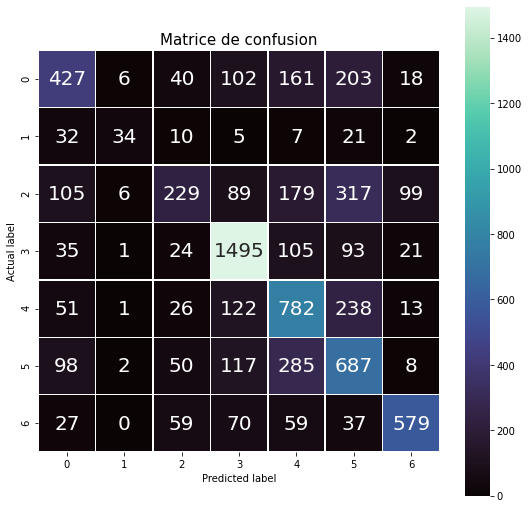

In [22]:
# Afficher la matrice de confusion de cette prédiction
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako', annot_kws={"fontsize":20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 15)

In [23]:
model.save('emotions_detection')

INFO:tensorflow:Assets written to: emotions_detection/assets


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.00001, beta_1=0.97, beta_2=0.97, epsilon=1e-07), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history2 = model.fit(X_train, y_train, epochs=1, batch_size=5, validation_data=(X_train, y_train))

5742/5742 [==============================] - 30s 5ms/step - loss: 1.1145 - accuracy: 0.5888 - val_loss: 0.8609 - val_accuracy: 0.6950


In [28]:
model.save('emotions_detection_2')

INFO:tensorflow:Assets written to: emotions_detection_2/assets


In [31]:
!zip -r /content/emotions_detection.zip /content/emotions_detection

  adding: content/emotions_detection/ (stored 0%)
  adding: content/emotions_detection/variables/ (stored 0%)
  adding: content/emotions_detection/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: content/emotions_detection/variables/variables.index (deflated 67%)
  adding: content/emotions_detection/assets/ (stored 0%)
  adding: content/emotions_detection/saved_model.pb (deflated 90%)


In [32]:
from google.colab import files
files.download("/content/emotions_detection.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
!zip -r /content/emotions_detection_2.zip /content/emotions_detection_2

  adding: content/emotions_detection_2/ (stored 0%)
  adding: content/emotions_detection_2/variables/ (stored 0%)
  adding: content/emotions_detection_2/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: content/emotions_detection_2/variables/variables.index (deflated 67%)
  adding: content/emotions_detection_2/assets/ (stored 0%)
  adding: content/emotions_detection_2/saved_model.pb (deflated 90%)


In [34]:
from google.colab import files
files.download("/content/emotions_detection_2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Matrice de confusion')

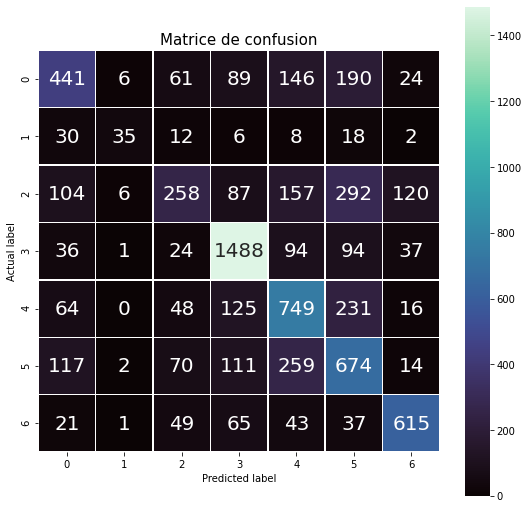

In [35]:
y_pred = model.predict_classes(X_test)
# Afficher la matrice de confusion de cette prédiction
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako', annot_kws={"fontsize":20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 15)